<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW4_PGalvezMolina/HW4_PGalvezMolina_Problem2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import scipy as sp
from scipy import stats

### Gist of the problem:
I am being asked to create a sampler (algorithm to predict a sample) to predict a gaussian of mean 2 and variance 2 (my target distribution). I will do so by sampling a gaussian distribution with my current sample as a mean and variance 1. My first sample will not be drawn from any distribution but it is set to be zero. I will run my sampler for at least 10⁴ trials, and then plot all of my samples in a histrogram where I will fit my target distribution.

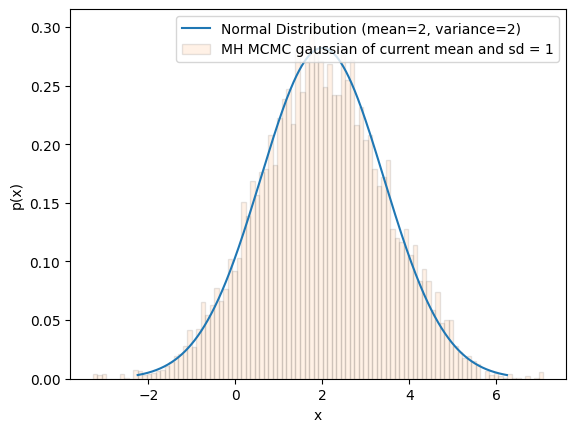

In [44]:
n = 10**4 # number of iterations/steps
# Plotting target distribution
mean = 2  # Mean of the target normal distribution
variance = 2  # Variance of the target normal distribution
sigma = np.sqrt(variance)  # Standard deviation of the target normal distribution

# Calculating n values of the target distribution to plot against n samples of proposal distribution
x_t = np.linspace(mean - 3*sigma, mean + 3*sigma, n)  # Generate x values
y_t = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_t - mean) / sigma)**2)  # Compute the normal distribution


# Defining MH Criteria for selection of samples
def isin(f_x,f_x_prime):
  r = np.random.uniform(0, 1)
  if f_x_prime/f_x > r:
    return True
  return False

# Calculating samples from proposal distribution
x_p = []
x = 0
for i in range(n):
  x_p.append(x)
  x_prime = np.random.normal(x, 1, 1)[0] #q(x_prime|x)
  f_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / sigma)**2)
  f_x_prime = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_prime - mean) / sigma)**2)
  x = x_prime if isin(f_x, f_x_prime) == True else x

# # Plotting results
plt.plot(x_t, y_t, label='Normal Distribution (mean=2, variance=2)')
plt.hist(x_p, bins = 100, density=True, edgecolor='black', alpha=0.1, label='MH MCMC gaussian of current mean and sd = 1')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(loc = 'upper right')
plt.show()

# Fig. 1. Application of MH MCMC method to sample a gaussian distribution of mean 2 and variance 2 (blue solid line). The proposal distribution applied was a gaussian of mean x, where x was the current sample. The noramlized frequency of the obtained values are ploted in the histogram (orange). The sampler was ran for 10⁴ iterations.

# <mark>WFF</mark> See this line of code of yours below? It's very clever and neat, and I wish I used it more. But I caution you against using it because one-line conditional statements like these make code very hard to read. Python was designed to be easily readable so try not to do this. Nothing wrong with it from a programmatic point of view though :)
```
x = x_prime if isin(f_x, f_x_prime) == True else x
```